In [5]:
from sympy import cos, diff, sin
from sympy.abc import x,y
import numpy as np
from math import isclose
from sympy.utilities.lambdify import lambdify

# Gradient Descent Demo

For this demo we chose a function where we can demonstrate how gradient descent works and how choosing different starting points <u>won't always</u> get you to the same minimum point.

## Useful `Sympy` Functions that are #Cool 😎👍

In [362]:
print('F(x)\n------')
expr = (x*x*cos(x) - x)/10
expr

F(x)
------


x**2*cos(x)/10 - x/10

### Using `diff()` to get the gradient / derivative of the function

In [363]:
print("F\'(x)\n------")
diff(expr, x)

F'(x)
------


-x**2*sin(x)/10 + x*cos(x)/5 - 1/10

### Using `lambdify()` to convert sympy equations to <u>actual callable python functions</u> #VeryCool™ 😎👍

In [367]:
from sympy.utilities.lambdify import lambdify

print('\033[1mSympy Equation of our given function:\033[0m')
display(expr)

print('\033[1mSympy Equation of the derivative:\033[0m')
display(diff(expr,x))


print('--------------------------------')
func = lambdify(x, expr)
fp = lambdify(x, diff(expr,x))
print(f'f(3.7): {func(3.7)}')
print(f'f_prime(3.7): {fp(3.7)}')

Sympy Equation of our given function:


x**2*cos(x)/10 - x/10

Sympy Equation of the derivative:


-x**2*sin(x)/10 + x*cos(x)/5 - 1/10

--------------------------------
f(3.7): -1.5310489434115488
f_prime(3.7): -0.002248346561974507


## Gradient Descent

In [346]:
def gradient_descent(x_initial, lr):
    # DEFINE FUNCTION
    f = lambdify(x, expr)
    
    # DEFINE GRADIENT OF FUNCTION
    f_prime = lambdify(x, diff(expr, x))
    
    ### INITIALIZE x_k
    x_k = x_initial
    
    x_start = x_k
    terminate = False
    for k in range(200):
        if k % 2 == 0:
            print("k = %d --" %k,"-- x_k = %.6f --" %x_k, "-- f(x_k) = %.6f" %f(x_k), "-- f_prime(x_k) = %.6f" %f_prime(x_k))
        if terminate:
            break
        x_prev = x_k

        ### UPDATE x_k
        x_k = x_k - lr*f_prime(x_k)
        
        ### TERMINATING CONDITION
        if isclose(x_k, x_prev, abs_tol=1e-07):
            terminate = True
    print('\n\n-------Summary of Result---------------')
    print(f'Stabilizes at x = {x_k} which spits out a value of {f(x_k)} 😎👍')
    
    ### Plotting
    x_range = np.linspace(-15,15,100)
    fig, ax = plt.subplots(figsize=(20,7))
    ax.plot(x_range, [f(x) for x in x_range])
    ax.scatter(x_start, f(x_start), color='red', label='start')
    ax.scatter(x_k, f(x_k), color='green', label='local minima')
    ax.legend()
    plt.title(f'{expr}');

**GDM Starting at x = 1, with learning rate 0.1**

k = 0 -- -- x_k = 1.000000 -- -- f(x_k) = -0.045970 -- f_prime(x_k) = -0.076087
k = 2 -- -- x_k = 1.015434 -- -- f(x_k) = -0.047178 -- f_prime(x_k) = -0.080536
k = 4 -- -- x_k = 1.031781 -- -- f(x_k) = -0.048535 -- f_prime(x_k) = -0.085442
k = 6 -- -- x_k = 1.049134 -- -- f(x_k) = -0.050064 -- f_prime(x_k) = -0.090867
k = 8 -- -- x_k = 1.067600 -- -- f(x_k) = -0.051797 -- f_prime(x_k) = -0.096884
k = 10 -- -- x_k = 1.087303 -- -- f(x_k) = -0.053771 -- f_prime(x_k) = -0.103580
k = 12 -- -- x_k = 1.108382 -- -- f(x_k) = -0.056033 -- f_prime(x_k) = -0.111057
k = 14 -- -- x_k = 1.131000 -- -- f(x_k) = -0.058639 -- f_prime(x_k) = -0.119438
k = 16 -- -- x_k = 1.155345 -- -- f(x_k) = -0.061661 -- f_prime(x_k) = -0.128867
k = 18 -- -- x_k = 1.181635 -- -- f(x_k) = -0.065188 -- f_prime(x_k) = -0.139520
k = 20 -- -- x_k = 1.210124 -- -- f(x_k) = -0.069333 -- f_prime(x_k) = -0.151606
k = 22 -- -- x_k = 1.241111 -- -- f(x_k) = -0.074243 -- f_prime(x_k) = -0.165379
k = 24 -- -- x_k = 1.274948 -- --

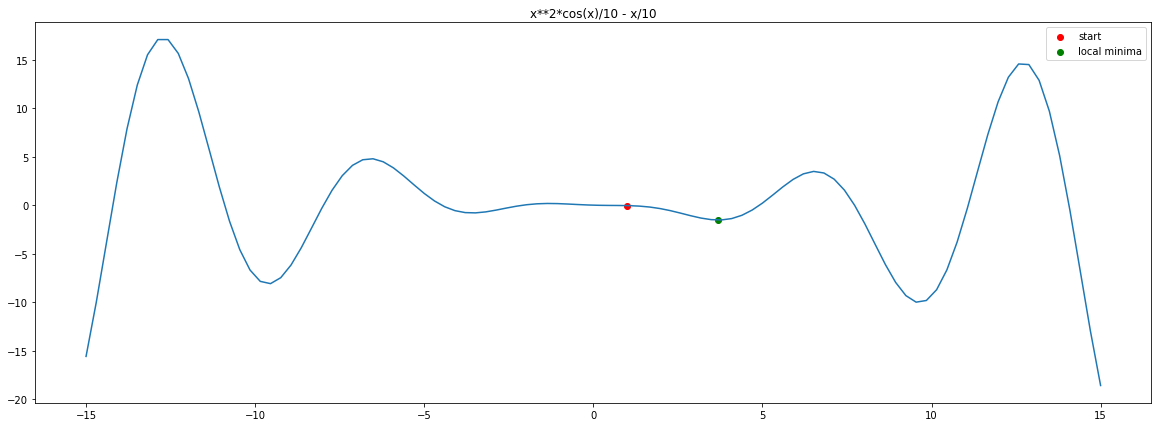

In [347]:
gradient_descent(1, 0.1)

**GDM Starting at x = 8, with learning rate 0.1**

>Another thing to note is that the gradient of the function `f_prime` approaches zero as we approach the local minimum as expected.

k = 0 -- -- x_k = 8.000000 -- -- f(x_k) = -1.731200 -- f_prime(x_k) = -6.664693
k = 2 -- -- x_k = 9.318818 -- -- f(x_k) = -9.567214 -- f_prime(x_k) = -2.871751
k = 4 -- -- x_k = 9.638664 -- -- f(x_k) = -10.042555 -- f_prime(x_k) = -0.011836
k = 6 -- -- x_k = 9.639883 -- -- f(x_k) = -10.042562 -- f_prime(x_k) = -0.000010
k = 8 -- -- x_k = 9.639884 -- -- f(x_k) = -10.042562 -- f_prime(x_k) = -0.000000


-------Summary of Result---------------
Stabilizes at x = 9.639884008933473 which spits out a value of -10.042562172358036 😎👍


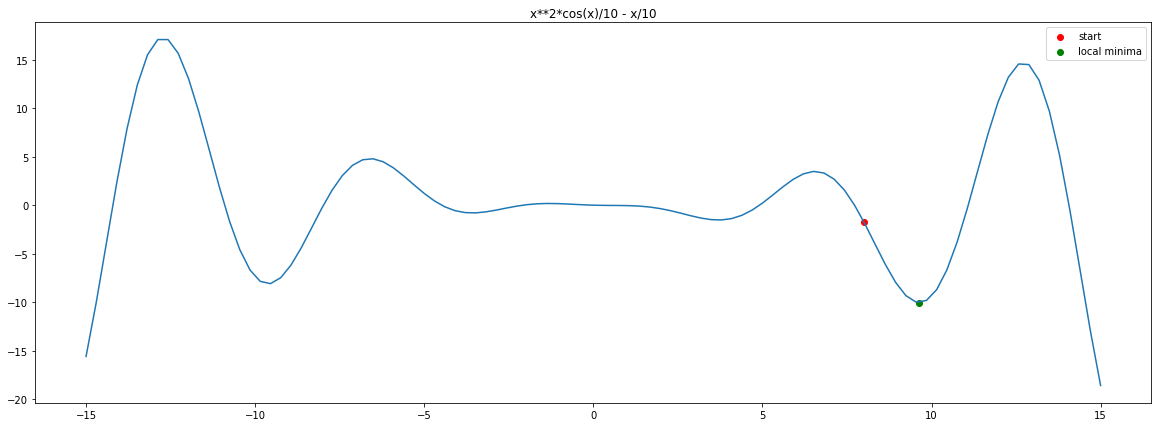

In [348]:
gradient_descent(8, 0.1)

k = 0 -- -- x_k = -8.000000 -- -- f(x_k) = -0.131200 -- f_prime(x_k) = 6.464693
k = 2 -- -- x_k = -9.284495 -- -- f(x_k) = -7.607054 -- f_prime(x_k) = 2.943962
k = 4 -- -- x_k = -9.617351 -- -- f(x_k) = -8.116635 -- f_prime(x_k) = 0.017732
k = 6 -- -- x_k = -9.619191 -- -- f(x_k) = -8.116652 -- f_prime(x_k) = 0.000025
k = 8 -- -- x_k = -9.619194 -- -- f(x_k) = -8.116652 -- f_prime(x_k) = 0.000000


-------Summary of Result---------------
Stabilizes at x = -9.619193566026023 which spits out a value of -8.116651540548482 😎👍


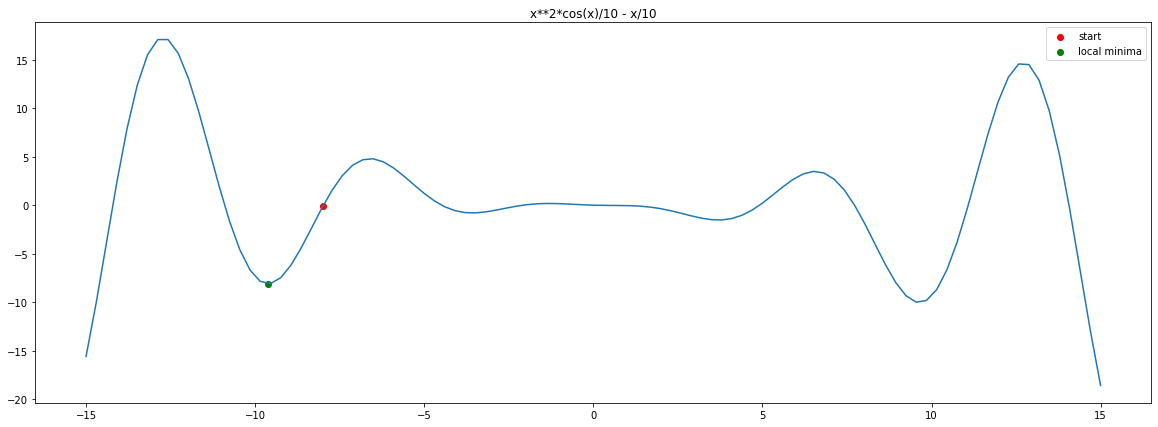

In [349]:
gradient_descent(-8, 0.1)

**We saw that starting at different points corresponded to different local minimum points!**

## Gradient Descent on N-Dimensions (2D in this example)

our objective function $f(\mathbf{x})$ is now a function of multiple variables, i.e. $f: \mathbb{R}^n \rightarrow \mathbb{R}$.

The gradient is now a vector-valued function

\begin{equation}
    \nabla f(\mathbf{x}) = \nabla f(x_1, x_2, \ldots, x_n) = \begin{bmatrix}
        \frac{\partial f(\mathbf{x})}{\partial x_1}\\
        \frac{\partial f(\mathbf{x})}{\partial x_2}\\
        \vdots\\
        \frac{\partial f(\mathbf{x})}{\partial x_n}
    \end{bmatrix}
\end{equation}


**The formula**

where $\mathbf{x}_{k}$ is a vector and the $\nabla f(\mathbf{x}_{k})$ is a vector
<center>$\mathbf{x}_{k+1} = \mathbf{x}_{k} - \alpha \nabla f(\mathbf{x}_{k})$</center>

In [350]:
expr = (2.5*x**2)*(sin(x)) + 2.5*y**2
expr

2.5*x**2*sin(x) + 2.5*y**2

### Using `lambdify` again this time with 2 variables

In [351]:
func = lambdify((x,y), expr)
lis = [1,2]
func(*lis)

12.103677462019741

### Partial Derivative of x

In [352]:
diff(expr, x)

2.5*x**2*cos(x) + 5.0*x*sin(x)

### Partial Derivative of y

In [353]:
diff(expr, y)

5.0*y

In [357]:
def gradient_descent_ndim(x_initial, lr):
    # DEFINE FUNCTION
    f = lambdify((x,y), expr)
    
    # DEFINE GRADIENT OF FUNCTION
    f_grad =[lambdify(x, diff(expr, x)), lambdify(y, diff(expr, y))]
    
    ### INITIALIZE x_k
    x_k = x_initial
    
    x_start = x_k
    terminate = False
    for k in range(5000):
        if k % 100 == 0:
            print("k = %d --" %k,"-- x_k[0] = %.6f --" %x_k[0], "-- x_k[1] = %.6f --" %x_k[1], "-- f(x_k) = %.6f" %f(*x_k), "-- f_grad_x = %.6f" %f_grad[0](x_k[0]), "-- f_grad_y = %.6f" %f_grad[1](x_k[1]))
        if terminate:
            print("k = %d --" %(k-1),"-- x_k[0] = %.6f --" %x_k[0], "-- x_k[1] = %.6f --" %x_k[1], "-- f(x_k) = %.6f" %f(*x_k), "-- f_grad_x = %.6f" %f_grad[0](x_k[0]), "-- f_grad_y = %.6f" %f_grad[1](x_k[1]))
            break
        x_prev = x_k

        ### UPDATE x_k
        x_k = x_k - lr*np.array([f_grad[0](x_k[0]), f_grad[1](x_k[1])])
        
        ### TERMINATING CONDITION
        if all(np.isclose(x_k, x_prev, atol=1e-07)):
            terminate = True
    print('\n\n-------Summary of Result---------------')
    print(f'Stabilizes at x, y = {x_k} which spits out a value of {f(*x_k)} 😎👍')
    
    
    fig = plt.figure(figsize=(30,30))
    ax = fig.add_subplot(1, 2, 1, projection='3d')
#     ax2 = plt.axes(projection='3d')
    x_range = np.linspace(-10,10,100)
    y_range = np.linspace(-10,10,100)
    X, Y = np.meshgrid(x_range, y_range)
    ax.contour3D(X, Y, f(X,Y), 100, cmap='Blues')
    ax.scatter(*x_initial, f(*x_initial), color='red', s=40, label='starting')
    ax.scatter(*x_k, f(*x_k), color='green', s=40, label='local minimum')
    ax.view_init(40, 85)
#     ax.view_init(10,90)
    ax.legend()
    
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    ax2.contour3D(X, Y, f(X,Y), 100, cmap='Blues')
    ax2.scatter(*x_initial, f(*x_initial), color='red', s=40, label='starting')
    ax2.scatter(*x_k, f(*x_k), color='green', s=40, label='local minimum')
    ax2.view_init(10, 90)
#     ax2.view_init(40,95)
    ax2.legend()


k = 0 -- -- x_k[0] = -2.000000 -- -- x_k[1] = -8.000000 -- -- f(x_k) = 150.907026 -- f_grad_x = 4.931506 -- f_grad_y = -40.000000
k = 100 -- -- x_k[0] = -2.288930 -- -- x_k[1] = -0.047364 -- -- f(x_k) = -9.857646 -- f_grad_x = 0.000000 -- f_grad_y = -0.236821
k = 200 -- -- x_k[0] = -2.288930 -- -- x_k[1] = -0.000280 -- -- f(x_k) = -9.863254 -- f_grad_x = 0.000000 -- f_grad_y = -0.001402
k = 297 -- -- x_k[0] = -2.288930 -- -- x_k[1] = -0.000002 -- -- f(x_k) = -9.863254 -- f_grad_x = 0.000000 -- f_grad_y = -0.000009


-------Summary of Result---------------
Stabilizes at x, y = [-2.28892973e+00 -1.83960408e-06] which spits out a value of -9.863254063202353 😎👍


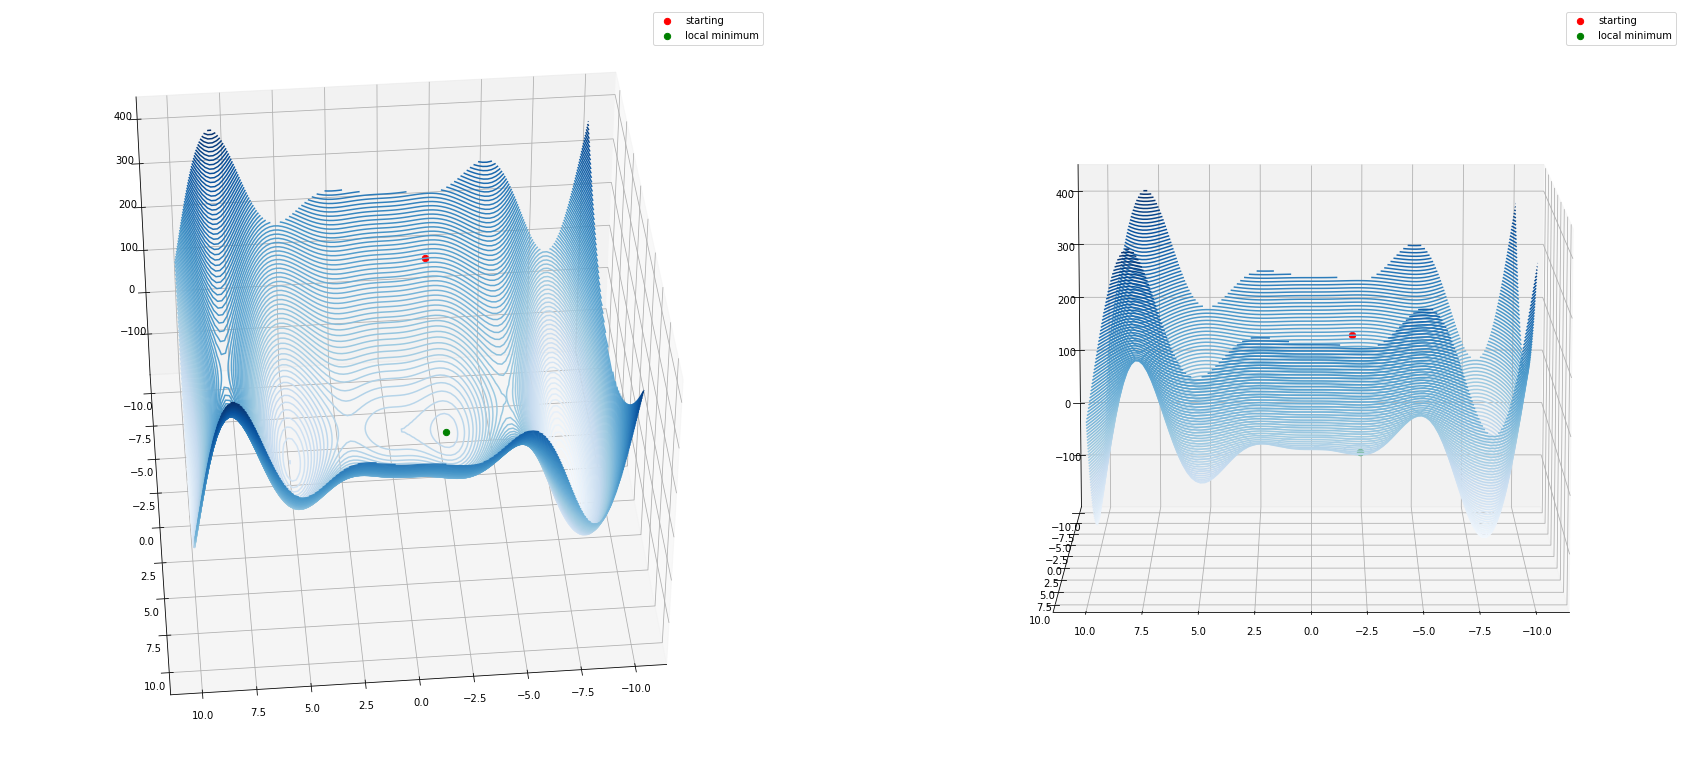

In [358]:
gradient_descent_ndim([-2,-8], 0.01)

k = 0 -- -- x_k[0] = 5.000000 -- -- x_k[1] = -7.500000 -- -- f(x_k) = 80.692233 -- f_grad_x = -6.244220 -- f_grad_y = -37.500000
k = 100 -- -- x_k[0] = 5.086985 -- -- x_k[1] = -0.044404 -- -- f(x_k) = -60.202471 -- f_grad_x = -0.000000 -- f_grad_y = -0.222020
k = 200 -- -- x_k[0] = 5.086985 -- -- x_k[1] = -0.000263 -- -- f(x_k) = -60.207400 -- f_grad_x = -0.000000 -- f_grad_y = -0.001314
k = 296 -- -- x_k[0] = 5.086985 -- -- x_k[1] = -0.000002 -- -- f(x_k) = -60.207401 -- f_grad_x = -0.000000 -- f_grad_y = -0.000009


-------Summary of Result---------------
Stabilizes at x, y = [ 5.08698509e+00 -1.81539876e-06] which spits out a value of -60.20740055766258 😎👍


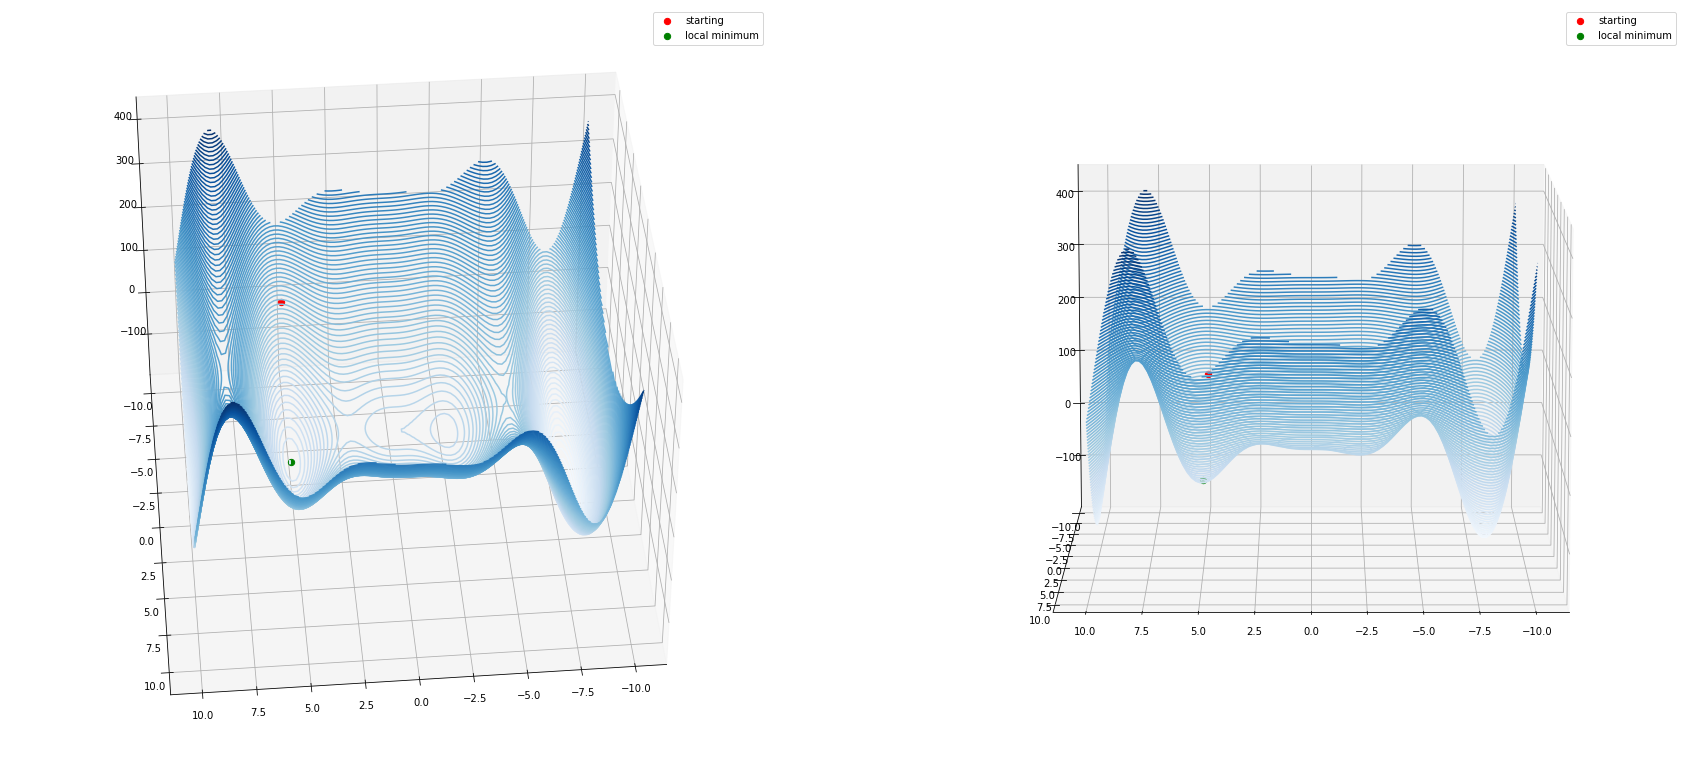

In [359]:
gradient_descent_ndim([5,-7.5], 0.01)

# Shoutout to Prof. Basti for giving us a #Cool intro to Gradient Descent during MDS

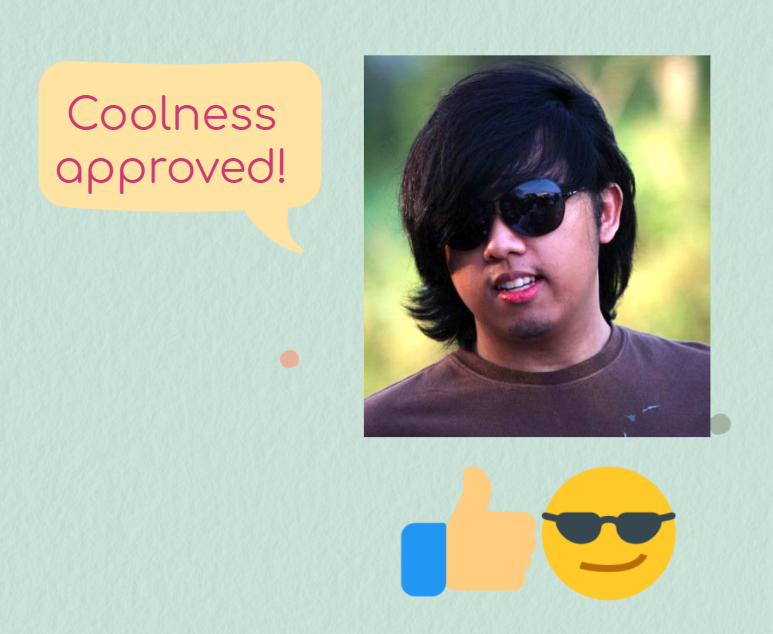

# And of course, Prof Chris for solidifying the concept for us!

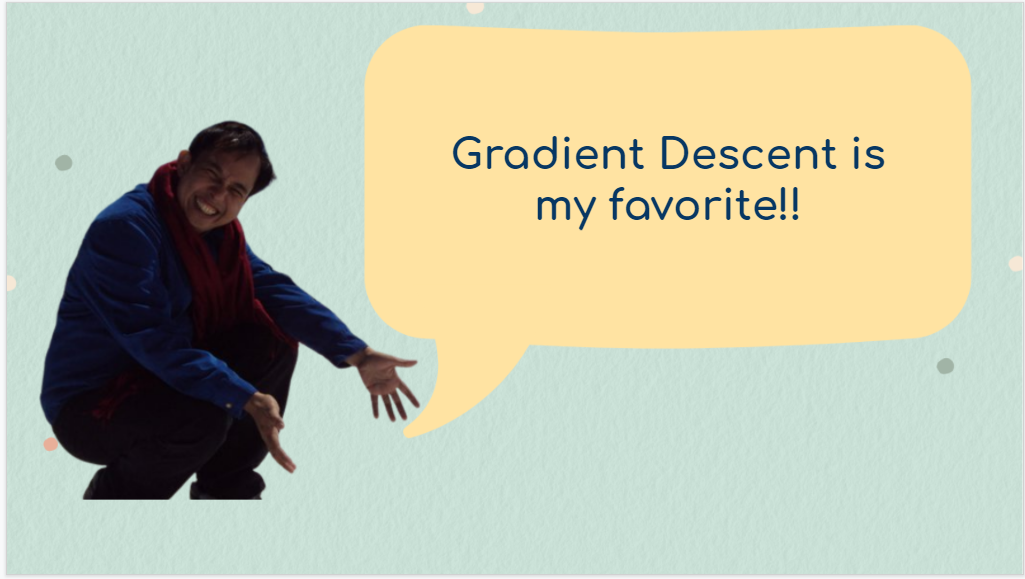

In [11]:
eq = 0.5*(2*x**3 - 9*x**2)**2
d_eq = diff(eq, x)

lr = 0.001

In [17]:
f_prime_eq = lambdify(x, d_eq)

x_k = 100

for i in range(1000):
    x_prev = x_k
    
    x_k = x_k - lr*f_prime_eq(x_k)
    
    print(f'x_k = {x_k} | precision = {x_prev-x_k}')


x_k = -111161900.0 | precision = 111162000.0
x_k = 2.0368595396695378e+38 | precision = -2.0368595396695378e+38
x_k = -4.207136986328758e+189 | precision = 4.207136986328758e+189


OverflowError: (34, 'Result too large')

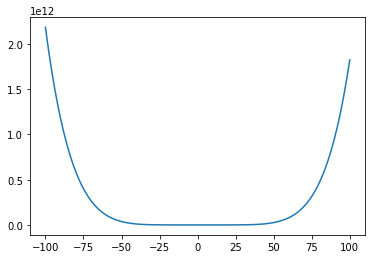

In [16]:
import matplotlib.pyplot as plt
x_range = np.linspace(-100,100,100)
plt.plot(x_range, lambdify(x, eq)(x_range))

In [63]:
from sympy import symbols, exp
w1 = symbols('w_1')
w2 =  symbols('w_2')
w3 =  symbols('w_3')

x1 = symbols('x_1')
x2 = symbols('x_2')

f1_expr = x1

f2_expr = x2**2
f3_expr = 1

Y_act = symbols('y_act')

g_input = f1_expr*w1 + f2_expr*w2 + f3_expr*w3
g_expr = 1 / (1+exp(-g_input))

Y_nn = g_expr



E = 0.5*(Y_nn - Y_act)**2

E
# f2_expr

0.5*(-y_act + 1/(exp(-w_1*x_1 - w_2*x_2**2 - w_3) + 1))**2

In [57]:
Y_nn

1/(exp(-w_1*x_1 - w_2*x_2**2 - w_3) + 1)

W1 update

In [36]:
gamma = symbols('gamma')

In [58]:
dE_w1 = diff(E, w1)
w1_update = w1 - gamma*dE_w1
w1_updatesn

-1.0*gamma*x_1*(-y_act + 1/(exp(-w_1*x_1 - w_2*x_2**2 - w_3) + 1))*exp(-w_1*x_1 - w_2*x_2**2 - w_3)/(exp(-w_1*x_1 - w_2*x_2**2 - w_3) + 1)**2 + w_1

In [64]:
dE_w1

1.0*x_1*(-y_act + 1/(exp(-w_1*x_1 - w_2*x_2**2 - w_3) + 1))*exp(-w_1*x_1 - w_2*x_2**2 - w_3)/(exp(-w_1*x_1 - w_2*x_2**2 - w_3) + 1)**2

In [59]:
sigmoid = 1 / (1+exp(-x1))
lambdify(x1, diff(sigmoid, x1))(2)

0.1049935854035065

In [60]:
lambdify(x1, sigmoid*(1-sigmoid))(2)

0.10499358540350662

In [62]:
lambdify((x1,x2,w1, w2, w3, gamma, Y_act), w1_update)(1,0,0.3,0,0, 0.001, 4)

0.3008374059989398